In [268]:
import re, string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory as SF
import pandas as pd
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
from nltk.probability import FreqDist
import nltk

# PREPROCCESS

In [269]:
def case_folding(data):
    data = data.lower()
    data = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",data).split())
    data = re.sub(r"\d+", "", data)
    data = data.translate(str.maketrans("","",string.punctuation))
    data = re.sub(r"\n","",data)
    data = re.sub(r"\t","",data)
    return data


In [270]:
def stopword_cleaner(data):
    sw_indonesia = stopwords.words("indonesian")
    data  = [word for word in data if word not in sw_indonesia]
    data = ' '.join(data)
    return data

In [271]:
def slang_cleaner(data):
    slang_list = [
        ('yg','yang'),
        ('ya','iya'),
        ('gak','tidak'),
        ('ga','tidak'),
        ('aja','saja'),
        ('kalo','kalau'),
        ('gajinya','gaji'),
        ('jg','juga'),
        ('jd','jadi'),
        ('klo','kalau'),
        ('dgn','dengan')
        
    ]
    
    word_token = word_tokenize(data)
    word_list = []
    
    for word in word_token:
        for slang in slang_list:
            if word.lower() in slang[0].lower():
                word = slang[1]
                break
        word_list.append(word)
    
    data = ' '.join(word_list)
    return data    

In [272]:
def proses(data):
    data = case_folding(data)
    data = word_tokenize(data)
    data = stopword_cleaner(data)
    return data

In [273]:
df = pd.read_csv('buruh_tweets_202112.csv') 
df.head()

,tweet,userid
0,"Tak Sesuai Kesepakatan, Buruh Tangerang Raya T...",58880688
1,@Resty442_ Kenapa demo buruh yg berjubel2 dapa...,1330047738541694978
2,Demo Buruh Rentan Ditunggangi Provokator\nhttp...,1213739491384426497
3,"@geloraco buruh, PP juga kemarin demo gak ada ...",930191748688592896
4,Berikanlah kepada buruh upahnya sebelum kering...,62988958


In [274]:
for index in range(len(df)):
    df.iloc[index,0] = proses(df.iloc[index,0])
    df.iloc[index,0] = slang_cleaner(df.iloc[index,0])
    df.iloc[index,0] = proses(df.iloc[index,0])

In [275]:
df.head()

,tweet,userid
0,sesuai kesepakatan buruh tangerang raya tolak ...,58880688
1,demo buruh berjubel izin terang benderang,1330047738541694978
2,demo buruh rentan ditunggangi provokator ayo d...,1213739491384426497
3,buruh pp kemarin demo tuh pasalan polisi pasie...,930191748688592896
4,berikanlah buruh upahnya kering keringatnya hr...,62988958


# TEXT ANALYSIS

In [276]:
df.to_csv("buruh_tweets_202112_clean.csv")
df_clean = pd.read_csv("buruh_tweets_202112_clean.csv")

In [277]:
def words_freq_distribution(data):
    data['tweet'] = data['tweet'].apply(lambda x: word_tokenize(str(x)))
    tweets = [word for tweet in data["tweet"] for word in tweet]
    fqdist = FreqDist(tweets)
    most_common_word = fqdist.most_common(50)
    print(most_common_word)
    
    fqdist.plot(20,cumulative=False)
    plt.show()
    return most_common_word, tweets


In [278]:
def char_freq_distribution(data):
    bin = np.arange(0,260,10)
    data["tweet"].str.len().hist(bins=bin)
    plt.show()

In [279]:
def word_len_freq_distribution(data):
    bin_range = np.arange(0, 50)
    df['tweet'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
    plt.show()

In [280]:
def mean_words_freq_distribution(data):
    df['tweet'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
    plt.show()   

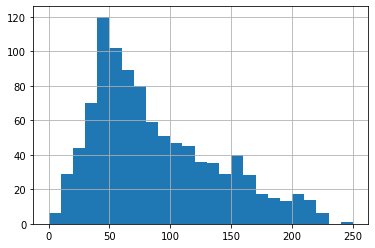

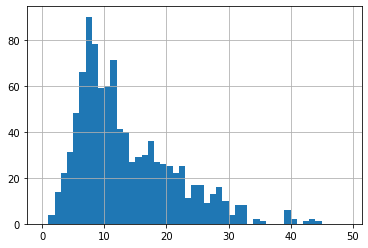

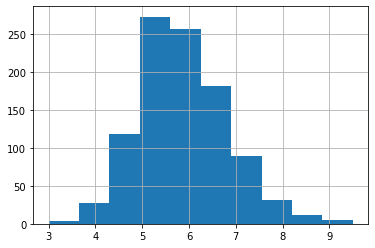

[('buruh', 1148), ('demo', 233), ('gaji', 217), ('upah', 162), ('umk', 105), ('berjiwa', 102), ('kerja', 93), ('iya', 87), ('aksi', 78), ('kenaikan', 63), ('ump', 61), ('pengusaha', 58), ('pabrik', 56), ('pejabat', 52), ('bahlil', 52), ('orang', 52), ('rakyat', 52), ('hidup', 51), ('indonesia', 47), ('negara', 42), ('gubernur', 41), ('pemerintah', 40), ('perusahaan', 37), ('serikat', 35), ('amp', 34), ('penetapan', 33), ('menteri', 33), ('mogok', 32), ('guru', 31), ('mahasiswa', 30), ('kebutuhan', 30), ('tuntut', 29), ('anak', 29), ('uu', 28), ('kecewa', 28), ('ditunggangi', 27), ('sih', 27), ('udah', 27), ('kemarin', 26), ('pekerja', 26), ('anies', 26), ('coba', 26), ('kaum', 26), ('ancam', 25), ('ajak', 25), ('ekonomi', 25), ('jawa', 25), ('kaya', 24), ('pandemi', 24), ('uang', 23)]


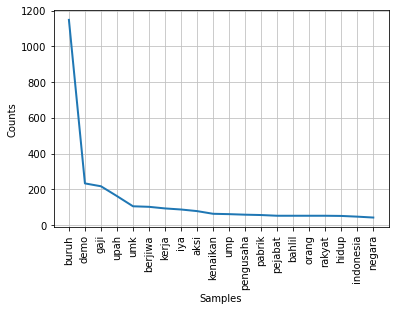

([('buruh', 1148),
  ('demo', 233),
  ('gaji', 217),
  ('upah', 162),
  ('umk', 105),
  ('berjiwa', 102),
  ('kerja', 93),
  ('iya', 87),
  ('aksi', 78),
  ('kenaikan', 63),
  ('ump', 61),
  ('pengusaha', 58),
  ('pabrik', 56),
  ('pejabat', 52),
  ('bahlil', 52),
  ('orang', 52),
  ('rakyat', 52),
  ('hidup', 51),
  ('indonesia', 47),
  ('negara', 42),
  ('gubernur', 41),
  ('pemerintah', 40),
  ('perusahaan', 37),
  ('serikat', 35),
  ('amp', 34),
  ('penetapan', 33),
  ('menteri', 33),
  ('mogok', 32),
  ('guru', 31),
  ('mahasiswa', 30),
  ('kebutuhan', 30),
  ('tuntut', 29),
  ('anak', 29),
  ('uu', 28),
  ('kecewa', 28),
  ('ditunggangi', 27),
  ('sih', 27),
  ('udah', 27),
  ('kemarin', 26),
  ('pekerja', 26),
  ('anies', 26),
  ('coba', 26),
  ('kaum', 26),
  ('ancam', 25),
  ('ajak', 25),
  ('ekonomi', 25),
  ('jawa', 25),
  ('kaya', 24),
  ('pandemi', 24),
  ('uang', 23)],
 ['sesuai',
  'kesepakatan',
  'buruh',
  'tangerang',
  'raya',
  'tolak',
  'penetapan',
  'umk',
  'b

In [281]:
char_freq_distribution(df_clean)
word_len_freq_distribution(df_clean)
mean_words_freq_distribution(df_clean)
words_freq_distribution(df_clean)


In [286]:
df['tweet'] = df['tweet'].apply(lambda x: word_tokenize(str(x)))
tweets = [word for tweet in df['tweet'] for word in tweet]
result = pd.Series(nltk.ngrams(tweets, 2)).value_counts()[:20]

In [287]:
print(result)

(demo, buruh)                102
(buruh, demo)                 59
(buruh, pabrik)               36
(upah, buruh)                 33
(buruh, berjiwa)              29
(serikat, buruh)              26
(gaji, buruh)                 25
(kaum, buruh)                 24
(buruh, buruh)                22
(kenaikan, upah)              20
(upah, minimum)               17
(mogok, kerja)                17
(aksi, buruh)                 16
(cipta, kerja)                16
(tuntut, upah)                16
(buruh, tani)                 16
(penetapan, ump)              16
(kenaikan, ump)               15
(buruh, gaji)                 15
(ditunggangi, provokator)     15
dtype: int64


Pada analisis text dari tweet 1000 tweet, jumlah karakter per tweet terbanyak diantara 40-50 karakter. Lalu panjang kata terbanyak diantara 7-8 kata pertweet.
Panjang rata-rata kata diantara 5-6 kata pertweet. Kata terbanyak yang muncul adalah kata buruh dengan 1148 kata, dilanjutkan dengan demo, gaji, upah, umk, dan seterusnya.
Pada analisis distribusi bi-gram, dapat dilihat bahwa keseluruhan tweet membahas tentang demo buruh pabrik yang meminta kenaikan upah/gaji.